In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(x_train, y_train),(x_test, y_test)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

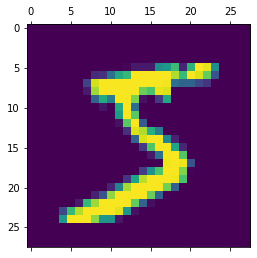

In [6]:
plt.matshow(x_train[0])

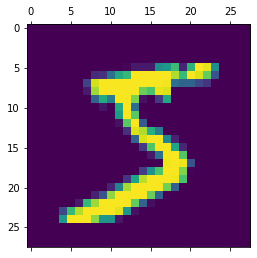

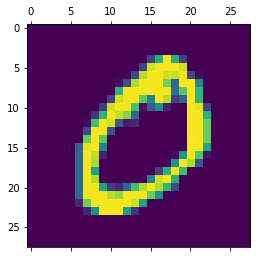

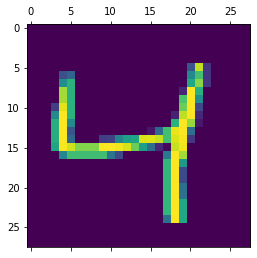

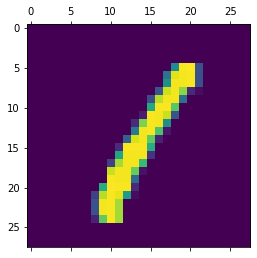

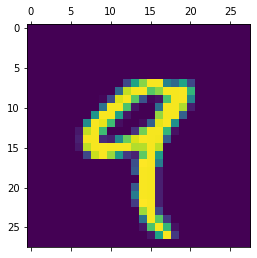

In [7]:
for i in range(0,5):
    plt.matshow(x_train[i])

In [8]:
y_train[1:5]

array([0, 4, 1, 9], dtype=uint8)

In [15]:
x_train=x_train/255
x_test=x_test/255

In [16]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [17]:
x_test_flattened.shape

(10000, 784)

In [18]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.4866 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 853us/step - loss: 0.3058 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 2s 988us/step - loss: 0.2859 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 1s 733us/step - loss: 0.2743 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9262


In [20]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 750us/step - loss: 0.2690 - accuracy: 0.9243


[0.2689751088619232, 0.9243000149726868]

In [21]:
y_pred=model.predict(x_test_flattened)

In [22]:
y_pred[0]

array([2.9097604e-05, 9.7566996e-11, 4.2568627e-05, 1.7317265e-02,
       1.0619988e-06, 6.6563043e-05, 1.0688496e-09, 7.3998362e-01,
       7.1467381e-05, 9.8484755e-04], dtype=float32)

In [23]:
np.argmax(y_pred[0])

7

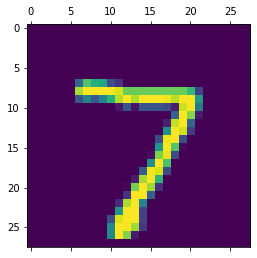

In [24]:
plt.matshow(x_test[0])

In [25]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[1:5]

[2, 1, 0, 4]

In [27]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

Text(69.0, 0.5, 'Truth')

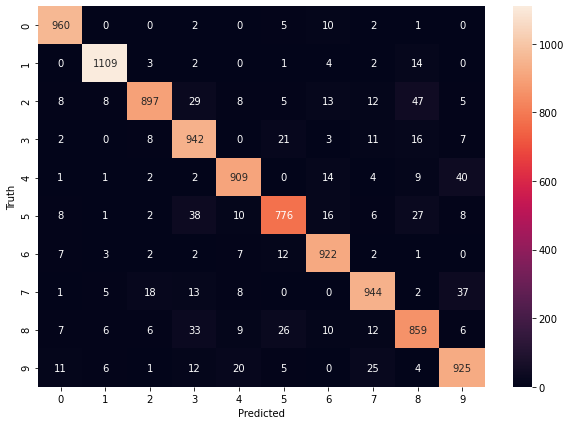

In [28]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
## Adding hidden layers

m1=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

m1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

m1.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2942 - accuracy: 0.9183
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0976 - accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0607 - accuracy: 0.9821


In [34]:
m1.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 993us/step - loss: 0.0887 - accuracy: 0.9732


[0.08869215846061707, 0.9732000231742859]

Text(69.0, 0.5, 'Truth')

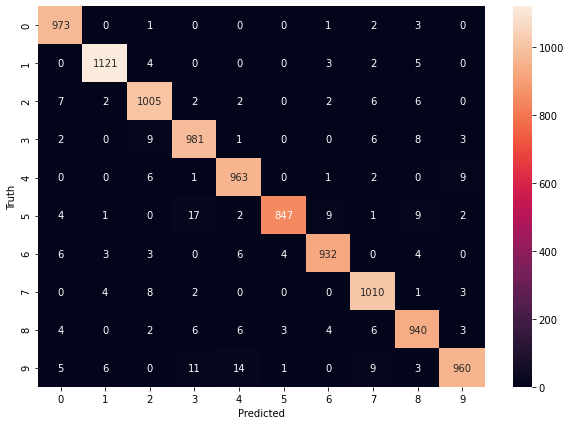

In [35]:
y_pred=m1.predict(x_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
## Flattening arrays with keras

m2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

m2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

m2.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.9185: 0s - los
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1381 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1011 - accuracy: 0.9700: 0s - loss: 0.1006 - accuracy
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0780 - accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0638 - accuracy: 0.9809
